In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib  import parse
from urllib.request import urlopen, Request
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import spatial
from sklearn.preprocessing import MinMaxScaler
import scipy

In [103]:
def getSleep(deviceNo, startDate) :
        endDate = startDate + 1
        url = f'http://52.231.67.67:3000/api/sensorData/duration?deviceNo={deviceNo}&startDate={startDate}&endDate={endDate}'
        
        request = Request(url)
        response_body = urlopen(request).read()
        dict = json.loads(response_body)

        # 서버에서 [] 넘어오는 경우 있음
        if len(dict) == 0 :  
            return -1*np.ones((1440,3)), False

        df = pd.DataFrame(dict)
        df = df.sort_values(by=['regdate'], ascending = [True])  # 밤00 ~ 23:59까지
        df["hour"] =df["regdate"].map(lambda x : x[11:16])
        df["hour_seq"] =df["regdate"].map(lambda x : int(x[11:13])*60+int(x[14:16]))
        
        
        tb = -1*np.ones((1440,3))
        
        for idx in range(len(df)) :
            d = df.iloc[idx]         
            tb[ int(d["hour_seq"]) , 0] =  int(d["hour_seq"])
            tb[ int(d["hour_seq"]) , 1] =  d["hr"]
            tb[ int(d["hour_seq"]) , 2] =  int(d["status"])
        return tb, True

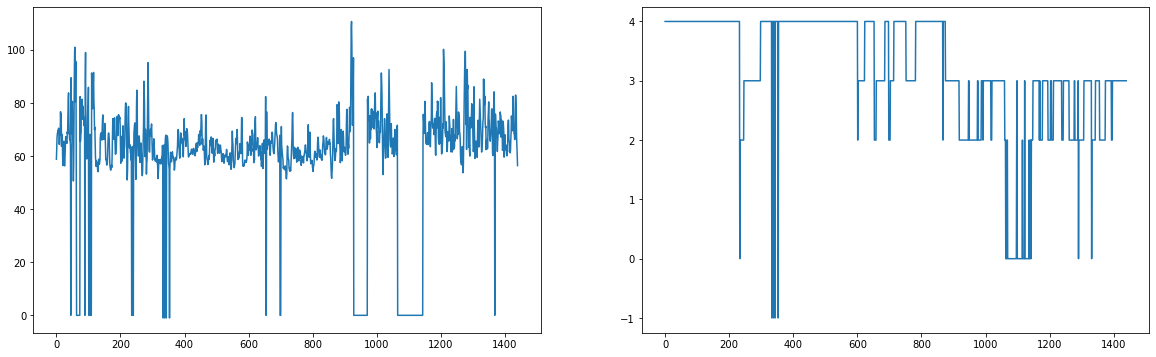

In [108]:
data, flag = getSleep(846, 20220831)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(data[:,1])
plt.subplot(1,2,2)
plt.plot(data[:,2])  

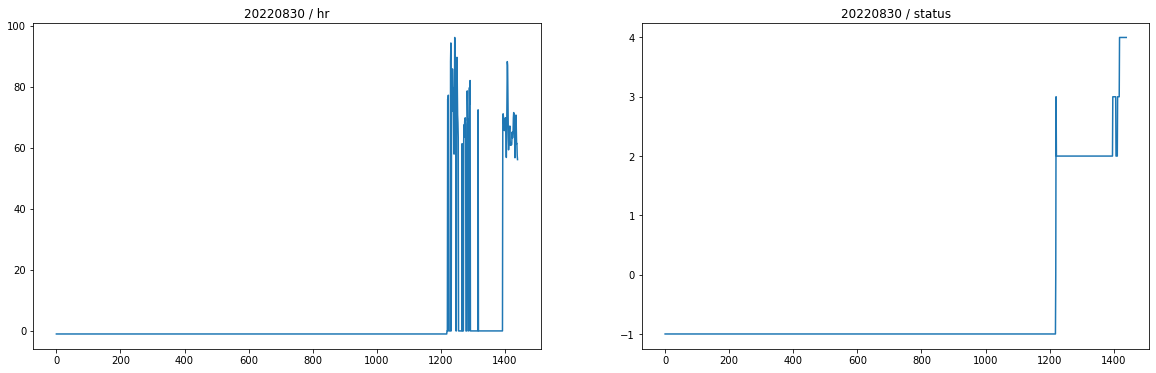

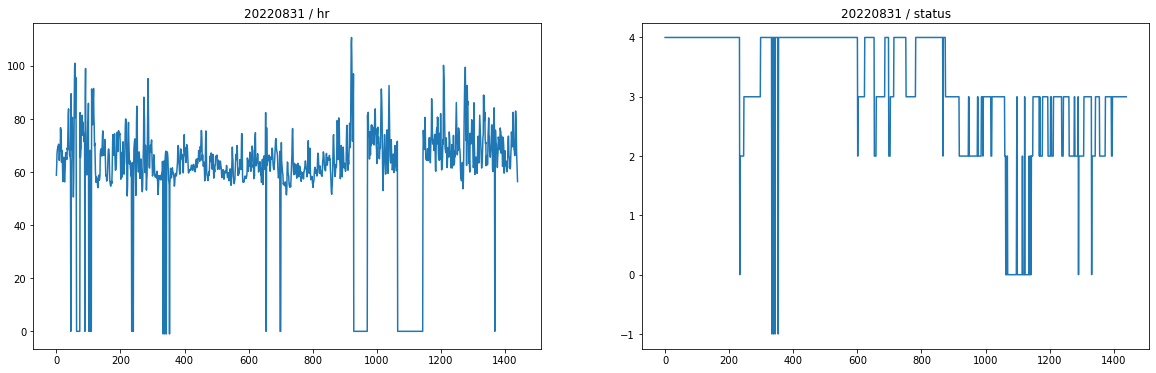

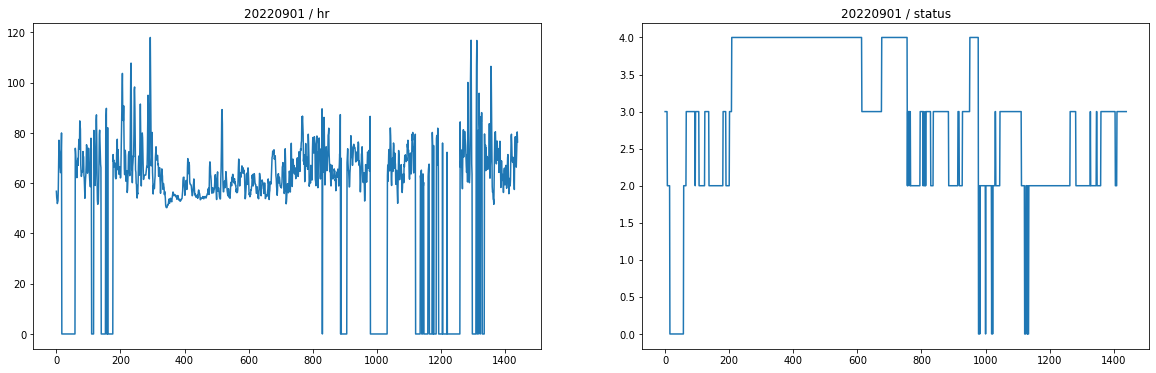

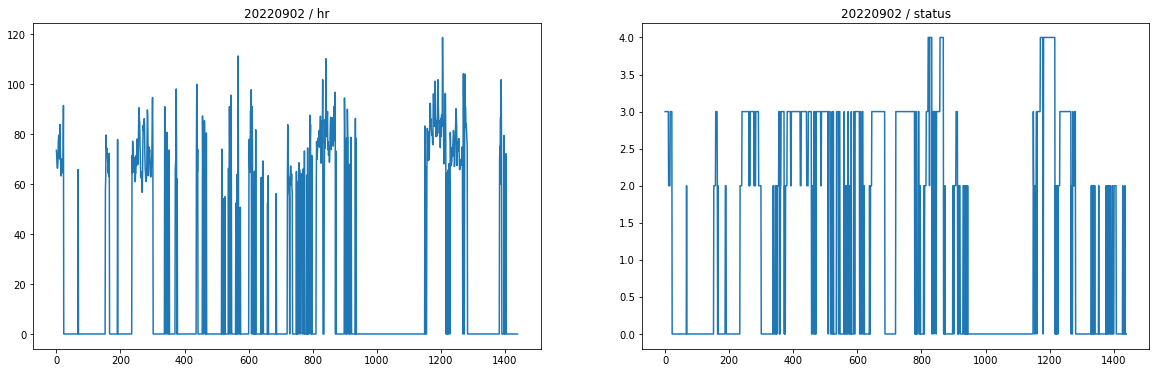

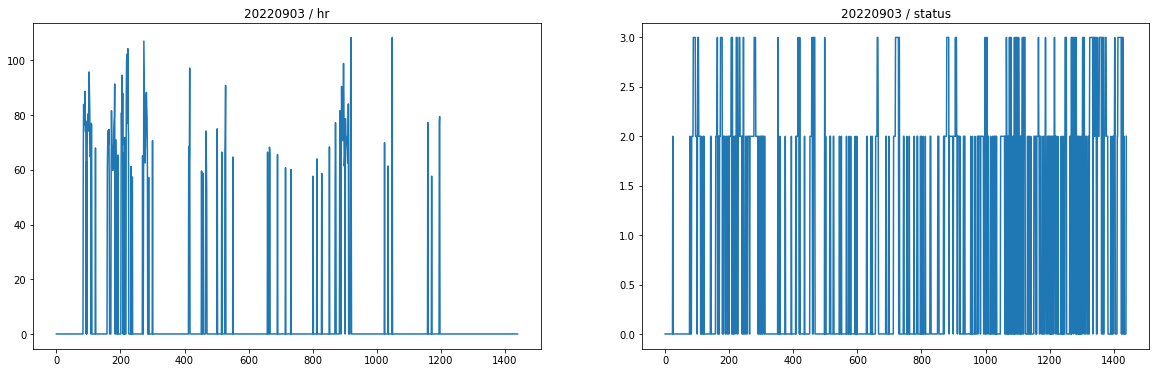

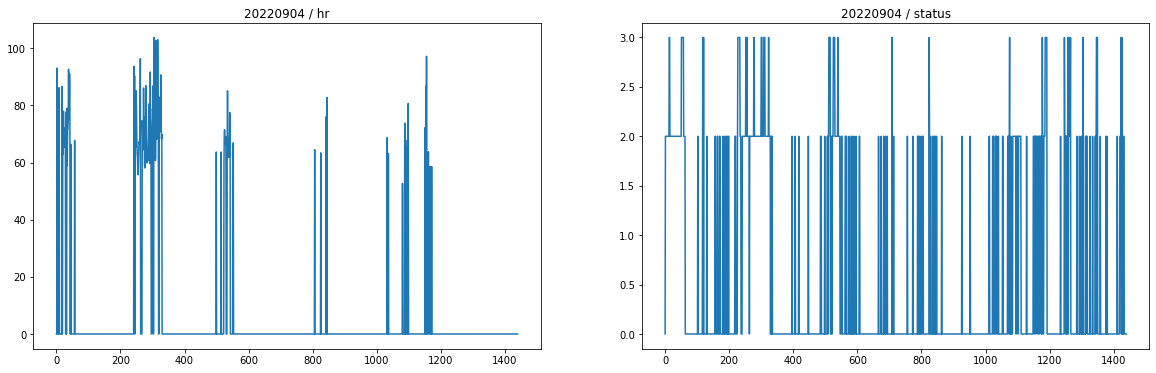

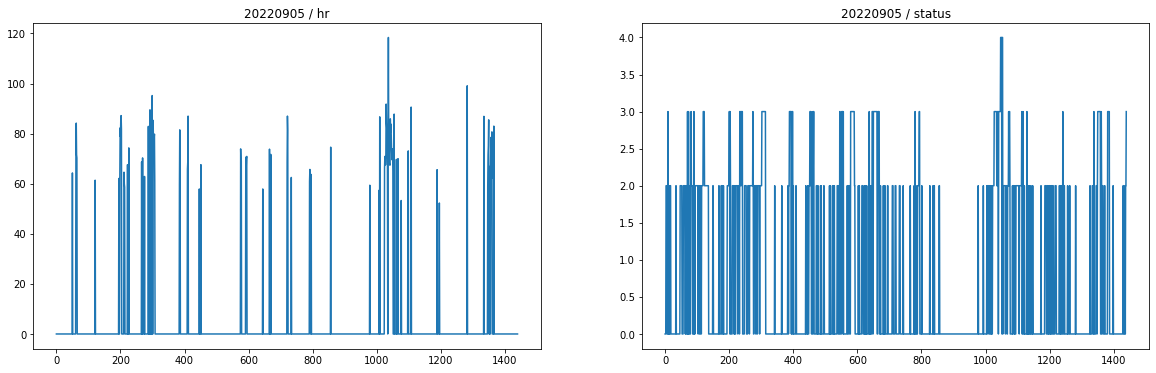

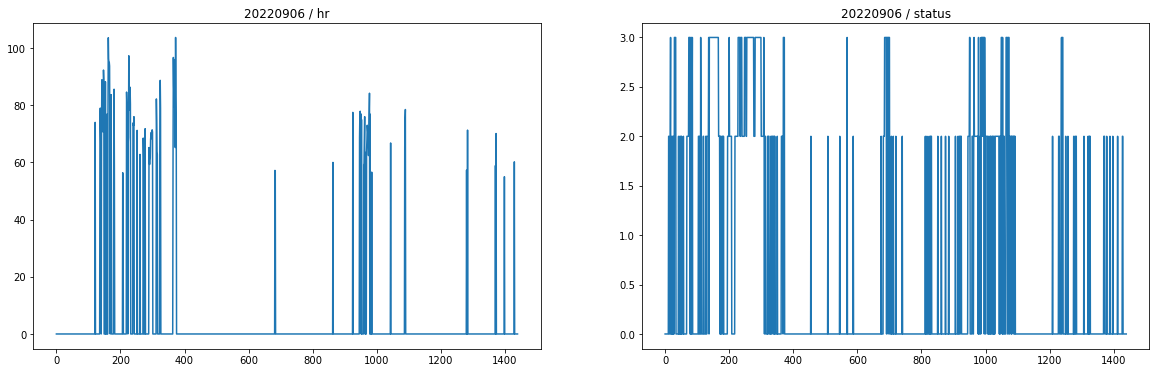

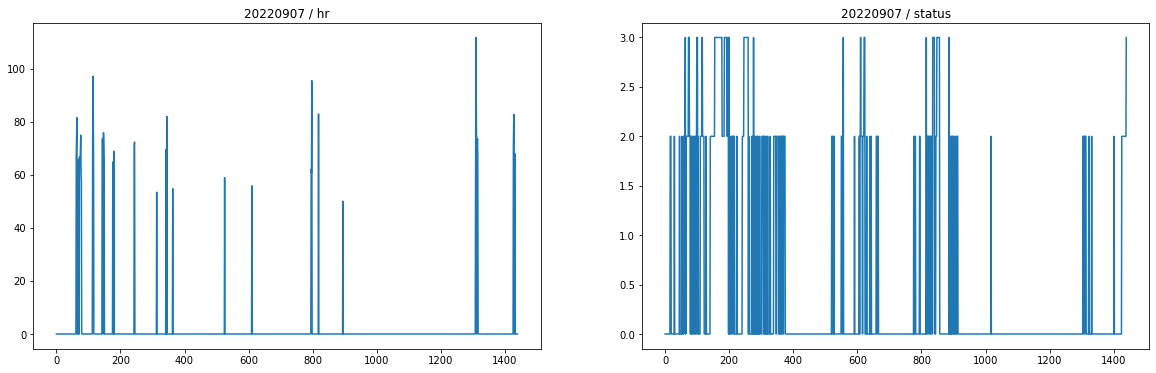

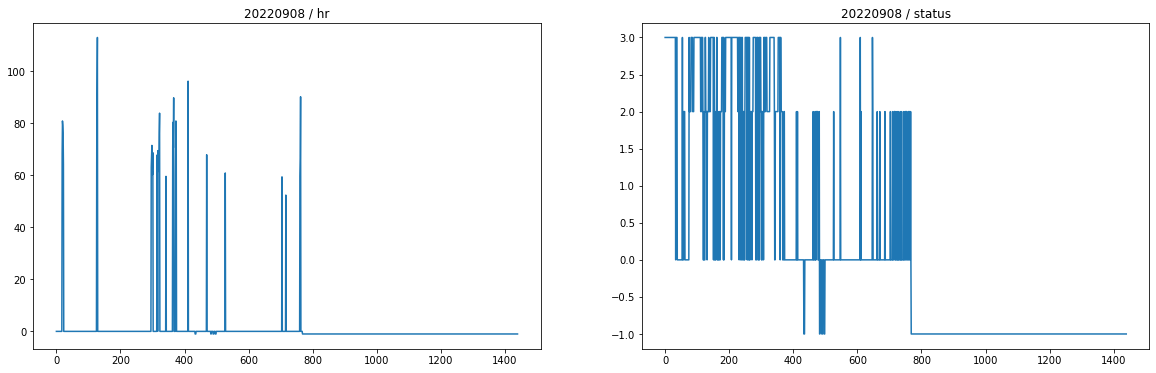

In [107]:
startDay = "20220701" 
endDay = "20220930"

for date in pd.date_range(start=startDay,end=endDay).tolist() : 
    day = date.strftime("%Y%m%d")    
    data, flag = getSleep(846, int(day))
    if flag :
        plt.figure(figsize=(20, 6))
        plt.subplot(1,2,1)
        plt.title(day + " / hr")    
        plt.plot(data[:,1])
        plt.subplot(1,2,2)
        plt.plot(data[:,2])
        plt.title(day + " / status")    